# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Heart Failure Prediction Dataset - Wasif Jafri</p>

## About dataset
Cardiovascular diseases (CVDs) are the leading cause of death worldwide, responsible for 17.9 million deaths annually, with heart attacks and strokes accounting for most cases. Early detection and management of CVDs are crucial, and machine learning can play a significant role in identifying individuals at high risk.

This dataset, comprising 918 observations and 11 features, combines data from five different heart disease datasets (Cleveland, Hungarian, Switzerland, Long Beach VA, and Stalog). It provides an excellent foundation for building predictive models to assess heart disease risk.

### Column Details

- **Age**: Age of the patient (in years).

- **Sex**: Gender of the patient:  
  - `M`: Male  
  - `F`: Female  

- **ChestPainType**: Type of chest pain experienced by the patient:  
  - `TA`: Typical Angina  
  - `ATA`: Atypical Angina  
  - `NAP`: Non-Anginal Pain  
  - `ASY`: Asymptomatic  

- **RestingBP**: Resting blood pressure (in mm Hg).

- **Cholesterol**: Serum cholesterol level (in mg/dl).

- **FastingBS**: Fasting blood sugar:  
  - `1`: If fasting blood sugar > 120 mg/dl  
  - `0`: Otherwise  

- **RestingECG**: Resting electrocardiogram results:  
  - `Normal`: Normal  
  - `ST`: ST-T wave abnormality (e.g., T wave inversions or ST elevation/depression > 0.05 mV)  
  - `LVH`: Left ventricular hypertrophy by Estes' criteria  

- **MaxHR**: Maximum heart rate achieved (numeric, 60–202).

- **ExerciseAngina**: Exercise-induced angina:  
  - `Y`: Yes  
  - `N`: No  

- **Oldpeak**: Depression of the ST segment during peak exercise (numeric value).

- **ST_Slope**: Slope of the peak exercise ST segment:  
  - `Up`: Upsloping  
  - `Flat`: Flat  
  - `Down`: Downsloping  

- **HeartDisease**: Target variable indicating the presence of heart disease:  
  - `1`: Heart disease  
  - `0`: Normal  


# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

### Read Dataset

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataset Info

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [118]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### No Missing Values found in the dataset

# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicates in Dataset</p>

In [119]:
df.duplicated().sum()

0

### No Duplicated data found

# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

### Numerical and Categorical columns seperation

In [120]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Numerical Columns Description

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Categorical Columns Description

In [122]:
df[categorical_columns].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


### All unique values in dataset

In [123]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Note that Sex , ChestPainType,ExerciseAngina,ST_Slope and RestingECG are ordinal features in dataset.

# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

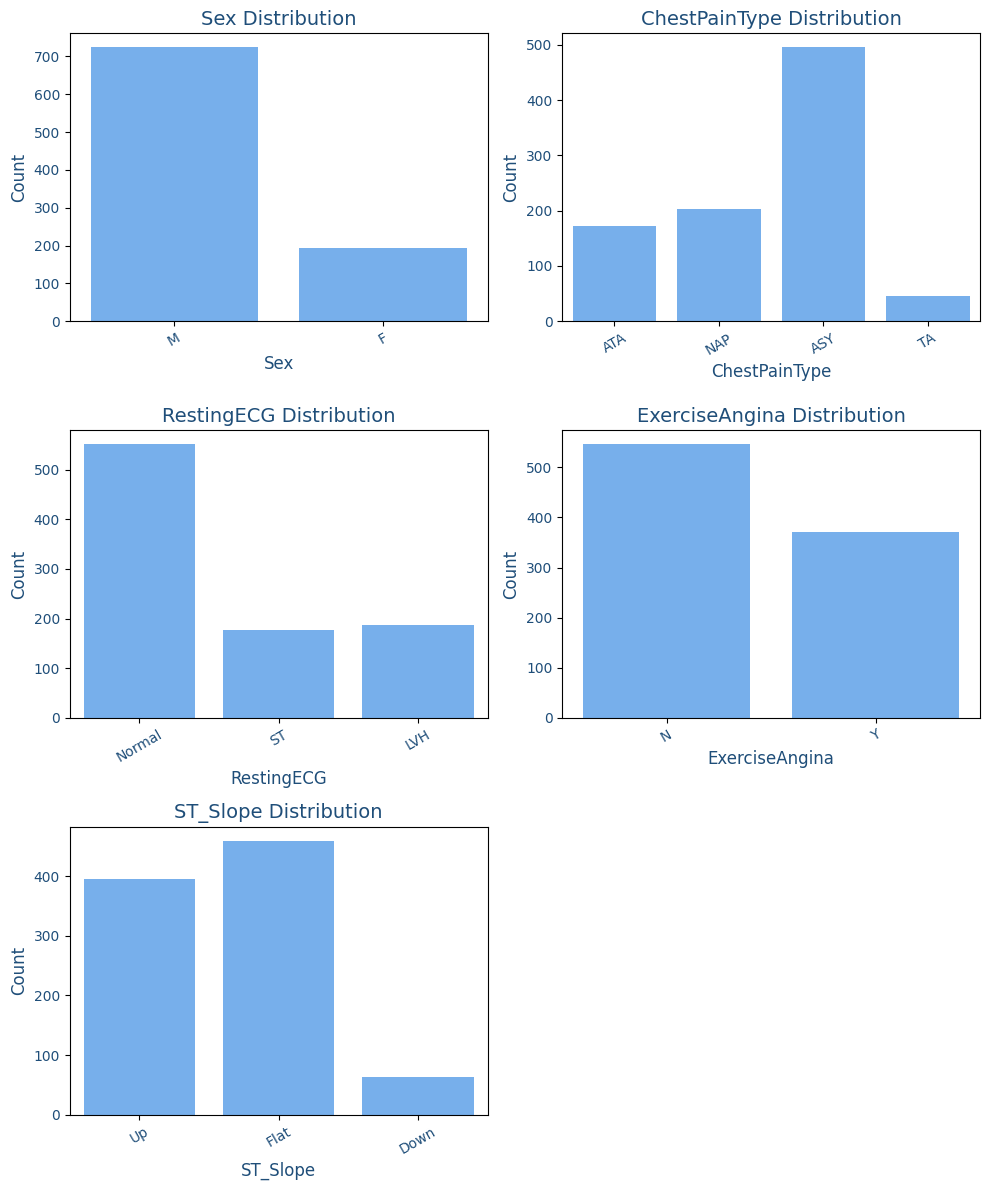

In [124]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set plot style to match the Pastel Purple Theme
sb.set_palette("pastel")
bar_color = "#64AEFE"  # Soft Purple for bars
text_color = "#1F4E79"  # Indigo for titles and labels


plt.figure(figsize=(10, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 2, idx)
    sb.countplot(data=df, x=col, color=bar_color)
    plt.title(f'{col} Distribution', fontsize=14, color=text_color)
    plt.xlabel(col, fontsize=12, color=text_color)
    plt.ylabel('Count', fontsize=12, color=text_color)
    plt.xticks(rotation=30, fontsize=10, color=text_color)
    plt.yticks(fontsize=10, color=text_color)

plt.tight_layout()
plt.show()

### Univariate analysis for categorical variables

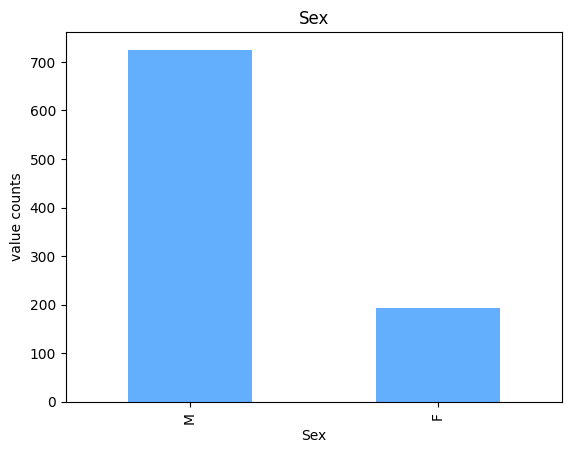

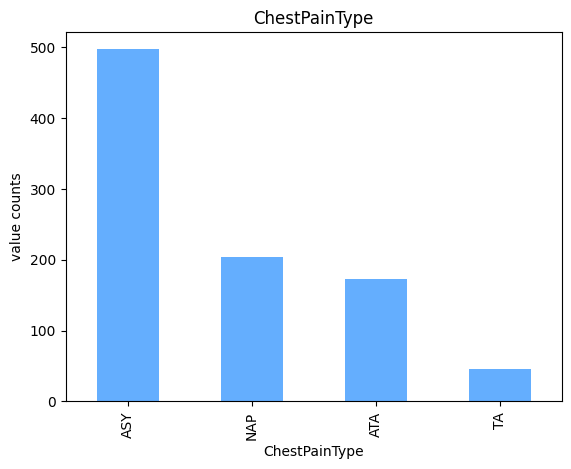

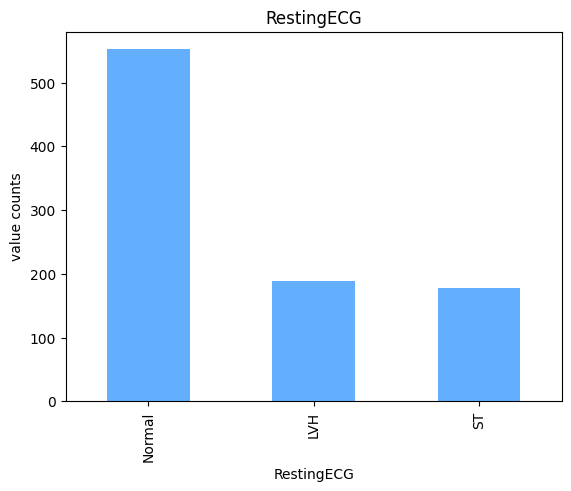

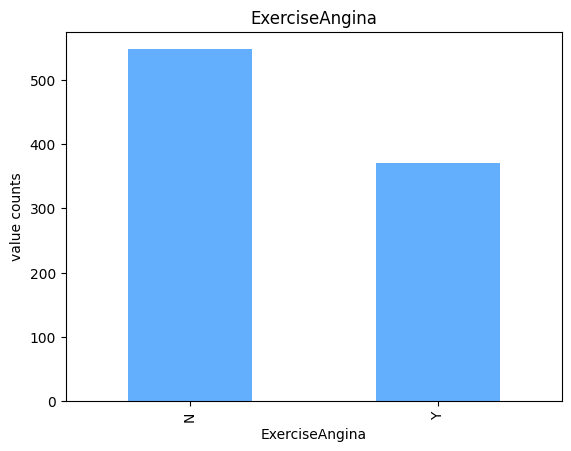

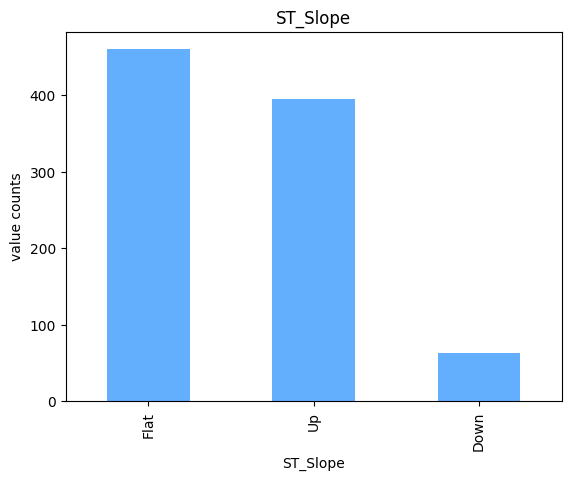

In [125]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i, color=bar_color)
    print('\n')
    plt.show()

# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

### Correlation heatmap

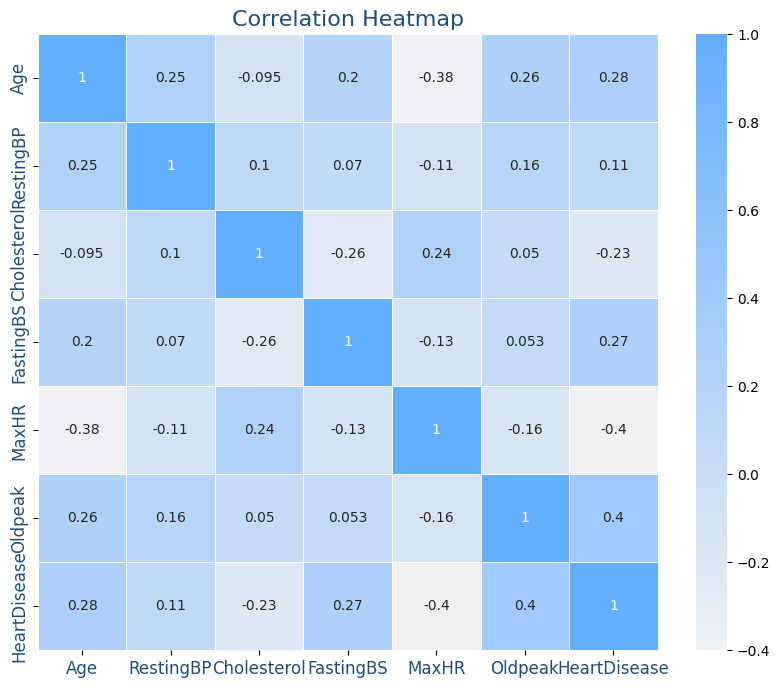

In [126]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create a custom colormap based on #A1C9F4
cmap = sb.light_palette("#64AEFE", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap=cmap, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap', fontsize=16, color="#1F4E79")  # Indigo for title
plt.xticks(fontsize=12, color="#1F4E79")
plt.yticks(fontsize=12, color="#1F4E79")
plt.show()


### Pairplot

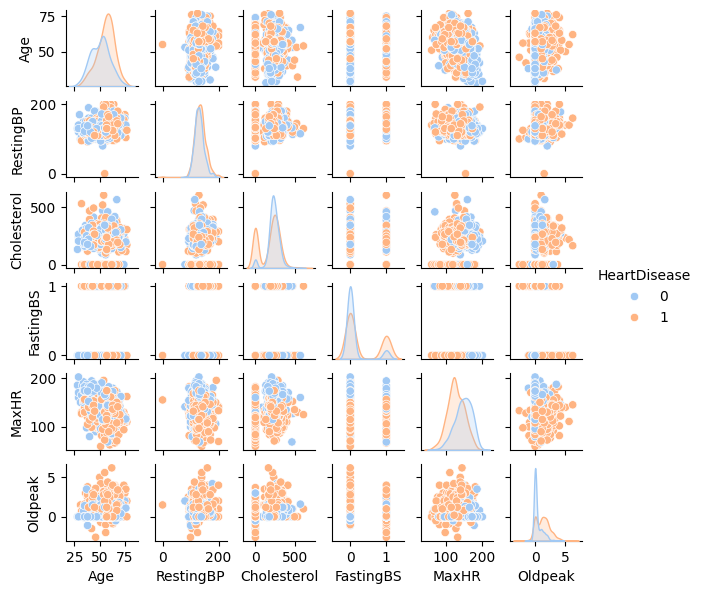

In [127]:
sb.pairplot(df,diag_kind='kde',size=1,hue='HeartDisease',palette='pastel')
plt.show()

## Numerical Features vs Target Feature Heart Disease Boxplot

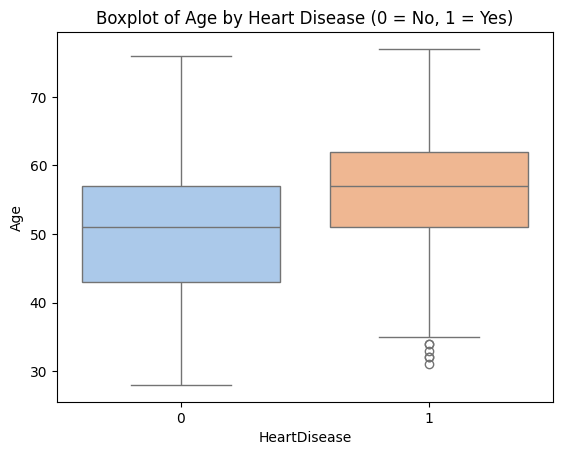

In [128]:
sb.boxplot(data=df, x='HeartDisease', y='Age', palette='pastel',color=bar_color)
plt.title(f'Boxplot of {'Age'} by Heart Disease (0 = No, 1 = Yes)')
plt.show()

Older individuals tend to have a higher risk of heart disease, as shown by the higher median age in the heart disease group.

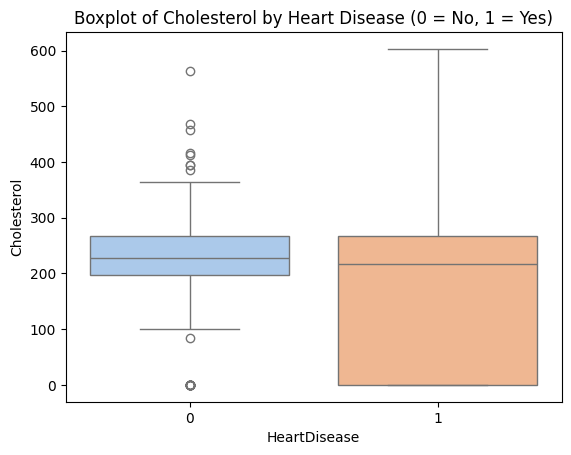

In [129]:
sb.boxplot(data=df, x='HeartDisease', y='Cholesterol', palette='pastel',color=bar_color)
plt.title(f'Boxplot of {'Cholesterol'} by Heart Disease (0 = No, 1 = Yes)')
plt.show()

People with heart disease generally show a wider range of cholesterol levels, with higher values being more common in this group.

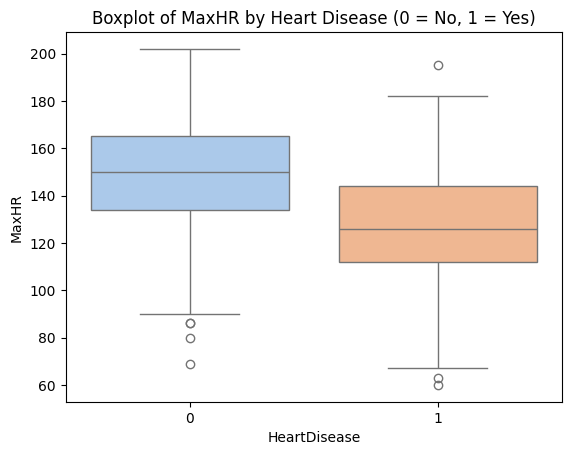

In [130]:
sb.boxplot(data=df, x='HeartDisease', y='MaxHR', palette='pastel',color=bar_color)
plt.title(f'Boxplot of {'MaxHR'} by Heart Disease (0 = No, 1 = Yes)')
plt.show()

Lower maximum heart rates are associated with heart disease, as the median MaxHR is lower in the heart disease group.

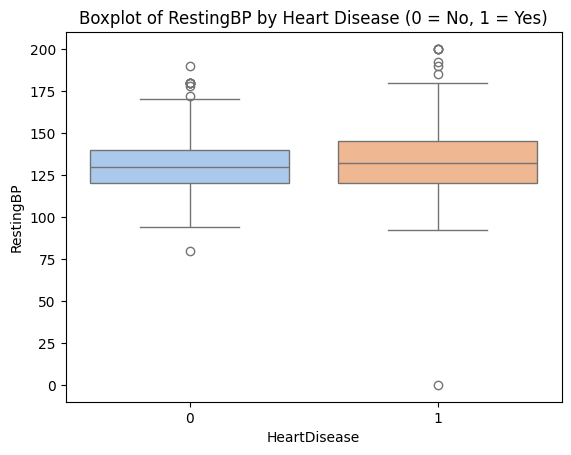

In [131]:
sb.boxplot(data=df, x='HeartDisease', y='RestingBP', palette='pastel',color=bar_color)
plt.title(f'Boxplot of {'RestingBP'} by Heart Disease (0 = No, 1 = Yes)')
plt.show()

The median resting blood pressure is similar for both groups, but extreme values could still offer valuable insights into heart health.

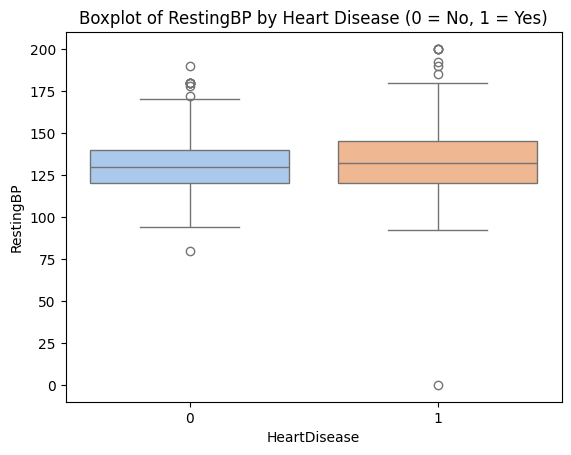

In [132]:
sb.boxplot(data=df, x='HeartDisease', y='RestingBP', palette='pastel',color=bar_color)
plt.title(f'Boxplot of {'RestingBP'} by Heart Disease (0 = No, 1 = Yes)')
plt.show()

Higher Oldpeak values, which indicate ST depression during exercise, are more common in individuals with heart disease. This suggests that Oldpeak may be a strong indicator of heart health issues.

# <p style="padding:10px;background-color:#64AEFE ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Scores</p>

In [133]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df_encoded = df.copy()

# LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

X = df_encoded.drop(columns=['HeartDisease'])  # Drop target variable
y = df_encoded['HeartDisease']


mi_scores = mutual_info_regression(X, y, random_state=42)

mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information Score': mi_scores
}).sort_values(by='Mutual Information Score', ascending=False)

print(mi_scores_df)


           Feature  Mutual Information Score
10        ST_Slope                  0.204726
8   ExerciseAngina                  0.151248
9          Oldpeak                  0.122832
2    ChestPainType                  0.112410
7            MaxHR                  0.073768
4      Cholesterol                  0.056517
1              Sex                  0.042387
6       RestingECG                  0.039114
5        FastingBS                  0.035884
0              Age                  0.034595
3        RestingBP                  0.026585


In [134]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


### Visualizing Mutual Information Scores

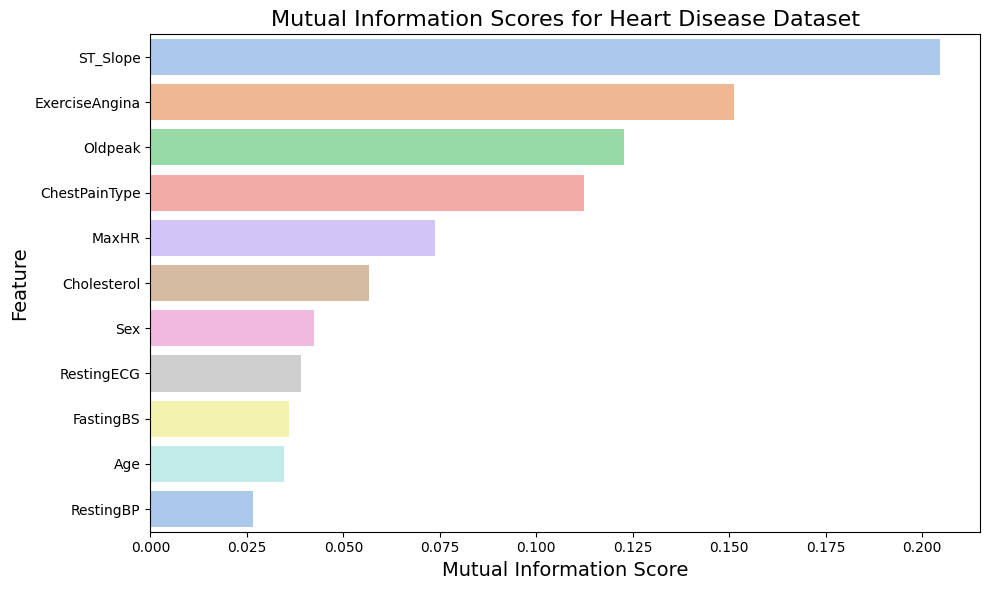

In [135]:
# Plot the Mutual Information scores
plt.figure(figsize=(10, 6))
sb.barplot(x='Mutual Information Score', y='Feature', data=mi_scores_df, palette='pastel', color=bar_color)
plt.title('Mutual Information Scores for Heart Disease Dataset', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

The mutual information scores highlight that ST_Slope, ExerciseAngina, and Oldpeak are the most informative features for predicting heart disease. These features likely capture critical patterns in cardiac health. Meanwhile, features like RestingBP and Age show relatively low mutual information, suggesting they may have less direct impact in predicting heart disease but could still contribute when combined with other features.